In [ ]:
# Question 1: Discretization
# Given a dataset of temperatures (in Fahrenheit) recorded over a week,
# Discretize temperatures into assigned categories

import pandas as pd
import math

temps = [72, 85, 90, 77, 65, 80, 95, 102, 60, 68, 88, 73, 78, 69, 91, -10, -5, -20]

# Cold, -inf to 69
# Warm, 70 to 85
# Hot, 86 to 99
# Very Hot, 100 to inf
bins = [-float(math.inf), 69, 85, 99, float(math.inf)]
labels = ["Cold", "Warm", "Hot", "Very Hot"]

discretized_temps = pd.cut(temps, bins=bins, labels=labels)

print(discretized_temps)

# The output will demonstrate sorting numerical values into discrete categories

['Warm', 'Warm', 'Hot', 'Warm', 'Cold', ..., 'Cold', 'Hot', 'Cold', 'Cold', 'Cold']
Length: 18
Categories (4, object): ['Cold' < 'Warm' < 'Hot' < 'Very Hot']


In [ ]:
# Question 2: Numeric Coding of Nominal/Ordinal Attributes
# 2A: One-Hot Encoding Using OneHotEncoder
# Convert list into numeric codes

from sklearn.preprocessing import OneHotEncoder

# place data into dataframe
car_brands = ["Toyota", "Ford", "Honda", "Toyota", "BMW", "Ford", "Honda"]
car_df = pd.DataFrame(car_brands)

# encode dataframe
encoder = OneHotEncoder(sparse_output=False)
one_hot_df = pd.DataFrame(encoder.fit_transform(car_df))

print(one_hot_df)

# The output encodes the brands accordingly into unique bins

     0    1    2    3
0  0.0  0.0  0.0  1.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
4  1.0  0.0  0.0  0.0
5  0.0  1.0  0.0  0.0
6  0.0  0.0  1.0  0.0


In [ ]:
# 2B: Ordinal Encding Using OrdinalEncoder
# Convert brand and size into numeric values

from sklearn.preprocessing import OrdinalEncoder

# place data into dataframe
car_info = {
    'Brand': ["Toyota", "Ford", "Honda", "Toyota", "BMW", "Ford", "Honda"],
    'Size': ["M", "L", "S", "XL", "M", "S", "L"]
}
car_df = pd.DataFrame(car_info)
categories = car_df.select_dtypes(include=['object']).columns.tolist()

# encode dataframe
encoder = OrdinalEncoder()
ordinal_encoded = encoder.fit_transform(car_df[categories])
ordinal_df = pd.DataFrame(ordinal_encoded, columns=encoder.get_feature_names_out(categories))

print(ordinal_df)

# The output demonstrates encoding more than one category into numeric values
# OrdinalEncoder assigns numeric values to each category so that matching values have the same code

   Brand  Size
0    3.0   1.0
1    1.0   0.0
2    2.0   2.0
3    3.0   3.0
4    0.0   1.0
5    1.0   2.0
6    2.0   0.0


In [ ]:
# 2C: Numeric Coding Using pandas' Factorize Function
# Encode car brands into numeric codes via pd.factorize()
# Print both the numeric codes and the uniquely identified categories

# factorize data
categories, codes = pd.factorize(["Toyota", "Ford", "Honda", "Toyota", "BMW", "Ford", "Honda"])

print("Numeric Codes: ", categories)
print("Unique Categories: ", codes)

# The output displays which categories were obtained
# The categorical index is used for the numerical code representation of the data
# Factorize returns a 1D array, where the numerical code is determined by order of reading
# Other encoding methods use a different approach to assign codes

Numeric Codes:  [0 1 2 0 3 1 2]
Unique Categories:  ['Toyota' 'Ford' 'Honda' 'BMW']


<ipython-input-6-52f348fe3308>:6: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  categories, codes = pd.factorize(["Toyota", "Ford", "Honda", "Toyota", "BMW", "Ford", "Honda"])


In [ ]:
# 2D: One-Hot Encding Using pandas' get_dummies Function
# One-hot encode the data using pd.get_dummies()

# place data into dataframe
car_brands = ["Toyota", "Ford", "Honda", "Toyota", "BMW", "Ford", "Honda"]
car_df = pd.DataFrame(car_brands)

print(pd.get_dummies(car_df))

# The output shows the data sorted into the table
# One-hot ordinal encoding "prioritizes" data codes by alphabetical order
# This can be helpful in certain circumstances however a hindrance given large sets of data with many categories

   0_BMW  0_Ford  0_Honda  0_Toyota
0  False   False    False      True
1  False    True    False     False
2  False   False     True     False
3  False   False    False      True
4   True   False    False     False
5  False    True    False     False
6  False   False     True     False


In [ ]:
# Question 3: Data Preprocessing and Cleansing
# Take the given dataset with missing values, errors, etc.
# Clean and preprocess the dataset by addressing issues

import numpy as np

# create and print dataset with all issues included
dataset = {
    'CustomerID' : [101, 102, 103, 104, 105, 106],
    'Age' : [25, np.nan, 31, -22, 28, 35],
    'Income' : [50000, 62000, np.nan, 45000, 78000, 88000],
    'Gender' : ["Male", "Female", "Male", "Unknown", "Female", "F"],
    'JoinedDate' : ["2022-01-15", "2022/01/20", "15-01-2022", "2022-01-22", np.nan, "2022-01-25"]
}
messy_df = pd.DataFrame(dataset)
print(messy_df)

# assign date format to single matching format, replace NaT
messy_df['JoinedDate'] = pd.to_datetime(messy_df.JoinedDate, format='mixed')
messy_df.replace({pd.to_datetime('NaT'): messy_df['JoinedDate'].median()}, inplace=True)

# replace numerical NaN values with average/mean of categories
messy_df['Age'] = messy_df['Age'].abs()
messy_df['Age'].fillna(messy_df['Age'].mean(), inplace=True)
messy_df['Income'].fillna(messy_df['Income'].mean(), inplace=True)
messy_df.replace({'F': 'Female'}, inplace=True)
messy_df['Gender'].replace({'Unknown': 'Female'}, inplace=True)

print(messy_df)

# The resulting dataset has replaced unknown/NaN values with the mean or median of its category

   CustomerID   Age   Income   Gender  JoinedDate
0         101  25.0  50000.0     Male  2022-01-15
1         102   NaN  62000.0   Female  2022/01/20
2         103  31.0      NaN     Male  15-01-2022
3         104 -22.0  45000.0  Unknown  2022-01-22
4         105  28.0  78000.0   Female         NaN
5         106  35.0  88000.0        F  2022-01-25
   CustomerID   Age   Income  Gender JoinedDate
0         101  25.0  50000.0    Male 2022-01-15
1         102  28.2  62000.0  Female 2022-01-20
2         103  31.0  64600.0    Male 2022-01-15
3         104  22.0  45000.0  Female 2022-01-22
4         105  28.0  78000.0  Female 2022-01-20
5         106  35.0  88000.0  Female 2022-01-25


In [ ]:
# Question 4: Feature Selection
# 4A: Recursive Feature Elimination
# Use RFE with linear regression to select the top 3 features to predict median house value

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

housing = fetch_california_housing()
x = housing.data
y = housing.target

estimate = LinearRegression()
select = RFE(estimate, n_features_to_select=3, step=15)
select = select.fit(x, y)
x_select = select.transform(x)
features = select.support_
ranking = select.ranking_
feature_names = [housing.feature_names[i] for i, bool_val in enumerate(features) if bool_val]

print("Selected features:", feature_names)

# RFE removes least important features to optimize model performance until n features remain
# This is helpful for dimensionality reduction with large quantities of data
# Median income obviously effects the cost of a house
# The more bedrooms in a house, the more influence on the house
# Longitude determines where in California the house is, most likely in reference to near-ness to the coast

Selected features: ['MedInc', 'AveBedrms', 'Longitude']


In [ ]:
# 4B: Feature Importance From Tree-Based Models
# Use Random Forest to determine top 3 features for prediction

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

housing = fetch_california_housing()
x = housing.data
y = housing.target

estimate = RandomForestRegressor(random_state=0)
select = RFE(estimate, n_features_to_select=3, step=15)
select = select.fit(x, y)
x_select = select.transform(x)
features = select.support_
ranking = select.ranking_
feature_names = [housing.feature_names[i] for i, bool_val in enumerate(features) if bool_val]

print("Selected features:", feature_names)

# Median income effects the cost of a house
# The average occupation feeds into the cost/affordability of a house
# Latitude will also contribute to housing location

Selected features: ['MedInc', 'AveOccup', 'Latitude']


In [ ]:
# 4C: L1-Based Feature Selection (Lasso Regularization)
# Use Lasso Regularization to perform feature selection by shrinking coefficients

from sklearn.linear_model import Lasso

housing = fetch_california_housing()
x = housing.data
y = housing.target

estimate = Lasso()
select = RFE(estimate, n_features_to_select=3, step=15)
select = select.fit(x, y)
x_select = select.transform(x)
features = select.support_
ranking = select.ranking_
feature_names = [housing.feature_names[i] for i, bool_val in enumerate(features) if bool_val]

print("Selected features:", feature_names)

# Median income effects the cost of a house
# The age of the house determines its risk and thus influences cost
# The population of an area contributes to housing prices

Selected features: ['MedInc', 'HouseAge', 'Population']


In [ ]:
# 4D: Mutual information Feature Selection
# Use Mutual Information Feature Selection to identify the top 3 features
# Determines highest dependency on target variable

from sklearn.feature_selection import SelectKBest, mutual_info_regression

housing = fetch_california_housing()
x = housing.data
y = housing.target

select = SelectKBest(score_func=mutual_info_regression, k=3)
select = select.fit(x,y)
x_select = select.transform(x)
features = select.get_support()
feature_names = [housing.feature_names[i] for i, bool_val in enumerate(features) if bool_val]

print("Selected features:", feature_names)

# This method evaluates features off of the mutual information scored with the target
# Dependency of variables is key to this approach

Selected features: ['MedInc', 'Latitude', 'Longitude']


In [ ]:
# 4E: Sequential Feature Selection
# Use Sequential Feature Selection to identify the top 3 features

from sklearn.feature_selection import SequentialFeatureSelector

housing = fetch_california_housing()
x = housing.data
y = housing.target

estimate = LinearRegression()
select = SequentialFeatureSelector(estimate, n_features_to_select=3)
select = select.fit(x, y)
x_select = select.transform(x)
features = select.support_
feature_names = [housing.feature_names[i] for i, bool_val in enumerate(features) if bool_val]

print("Selected features:", feature_names)

# This approach can either work with forward or backward selection on features
# It is very helpful when focusing on the performance of the model

Selected features: ['MedInc', 'HouseAge', 'AveRooms']


Text(0.5, 1.0, 'Transformed')

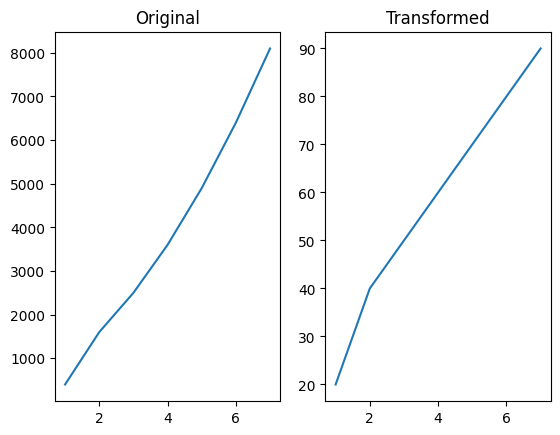

In [ ]:
# Question 5: Data Transformation
# Apply a square root transformation to reduce skewness of dataset

import matplotlib.pyplot as plt

dataset = {
    'HouseID': [1, 2, 3, 4, 5, 6, 7],
    'LotSize': [400, 1600, 2500, 3600, 4900, 6400, 8100]
}

df = pd.DataFrame(dataset)
df2 = pd.DataFrame(dataset)
df2['LotSize'] = np.sqrt(df2['LotSize'])

fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].plot(df['HouseID'], df['LotSize'])
axs[0].set_title('Original')
axs[1].plot(df2['HouseID'], df2['LotSize'])
axs[1].set_title('Transformed')

# The square root was applied to normalize the data and make it more manageable
# The transformation inverted the curve which helps give a more accurate analysis of the relationship and dependencies